In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
import requests
import json
import matplotlib
from matplotlib import pyplot

In [ ]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [5]:
#https://covid19-api.org/

In [25]:
record_date = '2020-10-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-10-16T23:24:02  8040922  218455    3197539
1      IN  2020-10-16T23:24:02  7370468  112161    6453779
2      BR  2020-10-16T23:24:02  5169386  152460    4526393
3      RU  2020-10-16T23:24:02  1361317   23580    1051780
4      AR  2020-10-16T23:24:02   949063   25342     764859


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


## Merubah Format date

Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format YYYY-mm-dd HH:MM:SS. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

In [26]:

df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

## Mengambil Data Countries

Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

In [27]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


## Merge Covid19 Data dan Countries

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

In [28]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-10-16  8040922  218455    3197539  United States of America
1      IN  2020-10-16  7370468  112161    6453779                     India
2      BR  2020-10-16  5169386  152460    4526393                    Brazil
3      RU  2020-10-16  1361317   23580    1051780        Russian Federation
4      AR  2020-10-16   949063   25342     764859                 Argentina


## Menghitung Fatality Ratio

Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [29]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

## Negara-negara dengan Fatality Ratio Tertinggi

Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [30]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
151,YE,2020-10-16,2055,596,1335,Yemen,0.290024
9,MX,2020-10-16,834910,85285,707631,Mexico,0.102149
191,EH,2020-10-16,10,1,8,Western Sahara,0.100000
15,IT,2020-10-16,391611,36427,247872,Italy,0.093018
32,EC,2020-10-16,151659,12357,128134,Ecuador,0.081479
156,TD,2020-10-16,1361,93,1138,Chad,0.068332
11,GB,2020-10-16,692104,43519,2564,United Kingdom of Great Britain and Northern I...,0.062879
182,FJ,2020-10-16,32,2,30,Fiji,0.062500
98,SD,2020-10-16,13691,836,6764,Sudan,0.061062
33,BO,2020-10-16,139319,8407,103499,Plurinational State of Bolivia,0.060344


## Visualisasi Negara dengan Fatality Ratio Tertinggi

Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

Variabel x axis adalah kolom name, dan kolom y atau value nya adalah kolom fatality_ratio dan gunakan fungsi plt.bar([value x axis, value y axis]).

Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

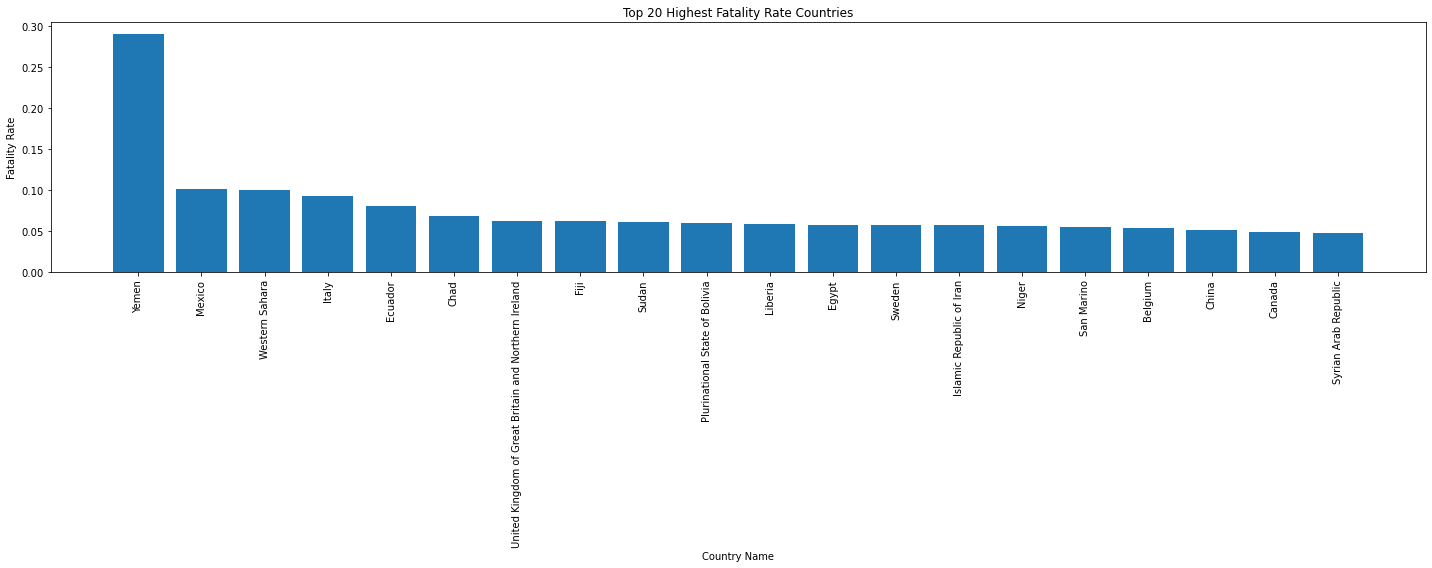

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Menggabungkan Dataframe

Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

    MY -> Malaysia,
    SG -> Singapure,
    TH -> Thailand,
    VN -> Vietnam.

Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().

Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

Cetaklah lima data teratas dari dataframe yang telah dibentuk.

In [32]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1

print(df_covid_timeline_merged.head())

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-10-17   1124      35       1031
1      VN  2020-10-16   1124      35       1030
2      VN  2020-10-15   1124      35       1030
3      VN  2020-10-14   1122      35       1029
4      VN  2020-10-13   1113      35       1025


## Merge Data Covid19 Dengan Data Country

Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.

In [33]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

## Kasus Covid-19 di ASEAN pada Bulan Maret 2020

Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yangdiambil. Format datetime.date menggunakan format YYYY, mm, dd.

In [34]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

## Visualisasi Kasus Covid-19 di ASEAN

Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.

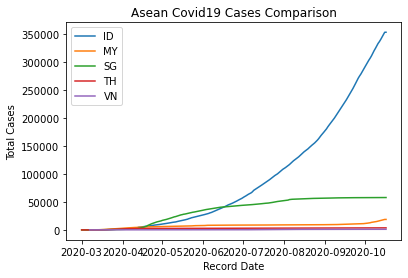

In [35]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x,y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()